In [1]:
!pip install wget
!pip install open3d
!pip install pypotree

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=51f5af9b4371baff2266358947c06ec04bd182aa807b7b940c25d791a2d060f1
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.

In [3]:
# mount google drive
import os
import wget
from google.colab import drive
drive.mount('/content/drive', force_remount=False)
%cd /content/drive/My Drive/

Mounted at /content/drive
/content/drive/My Drive


In [4]:
# Create download directory if it doesn't exist
download_path = "CameraLidarFusion"
if not os.path.exists(download_path):
    os.makedirs(download_path)
    print(download_path, "- Created Successfully!")
else:
    print("Folder already exists!")

CameraLidarFusion - Created Successfully!


In [5]:
# download the dataset
dataset_url = "https://s3.eu-central-1.amazonaws.com/avg-kitti/raw_data/2011_09_26_drive_0001/2011_09_26_drive_0001_sync.zip"
print('Downloading dataset zip file...')
wget.download(dataset_url, out=download_path)

'CameraLidarFusion/2011_09_26_drive_0001_sync.zip'

In [6]:
# Unzip the dataset
%cd CameraLidarFusion
!unzip 2011_09_26_drive_0001_sync.zip &> /dev/null
%cd /content/drive/MyDrive/CameraLidarFusion/2011_09_26/2011_09_26_drive_0001_sync

/content/drive/MyDrive/CameraLidarFusion
/content/drive/MyDrive/CameraLidarFusion/2011_09_26/2011_09_26_drive_0001_sync


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import glob
import numpy as np
import struct
import open3d as o3d

In [8]:

# BinToPcd function
def BinToPcd(point_file):
  size_float = 4
  list_pcd = []
  file_to_open = point_file
  file_to_save = str(point_file)[:-3]+"pcd"
  with open (file_to_open, "rb") as f:
      byte = f.read(size_float*4)
      while byte:
          x,y,z,intensity = struct.unpack("ffff", byte)
          list_pcd.append([x, y, z])
          byte = f.read(size_float*4)
  np_pcd = np.asarray(list_pcd)
  pcd = o3d.geometry.PointCloud()
  v3d = o3d.utility.Vector3dVector
  pcd.points = v3d(np_pcd)
  o3d.io.write_point_cloud(file_to_save, pcd)

# Read bin files
point_files = sorted(glob.glob("velodyne_points/data/*.bin"))
# Convert bin to PCD
for binFile in point_files:
  BinToPcd(binFile)

In [9]:
image_files = sorted(glob.glob("image_02/data/*.png"))
point_files = sorted(glob.glob("velodyne_points/data/*.pcd"))
index = 0
pcd_file = point_files[index]
image = cv2.cvtColor(cv2.imread(image_files[index]), cv2.COLOR_BGR2RGB)
cloud = o3d.io.read_point_cloud(pcd_file)
points= np.asarray(cloud.points)

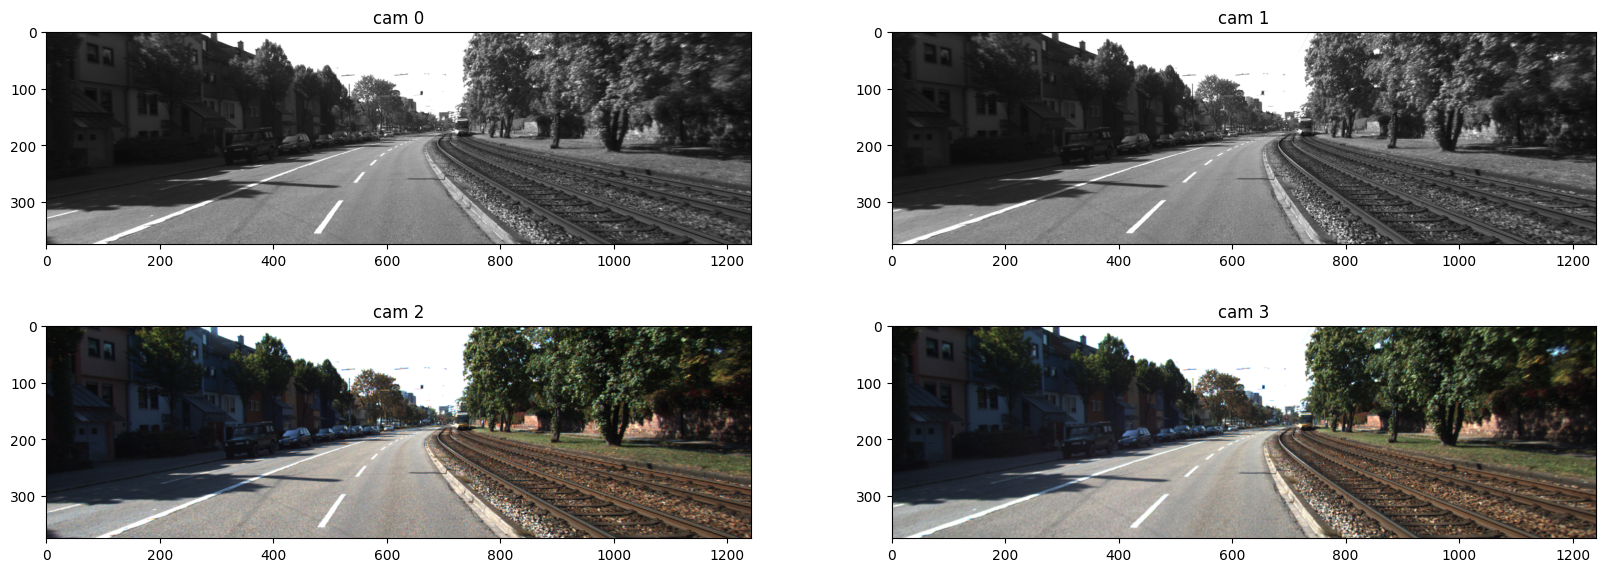

In [10]:
# read all the cameras data
camera0_images = sorted(glob.glob("image_00/data/*.png"))
camera1_images = sorted(glob.glob("image_01/data/*.png"))
camera2_images = sorted(glob.glob("image_02/data/*.png"))
camera3_images = sorted(glob.glob("image_03/data/*.png"))

# Create 4 images for 4 cameras
img_cam0 = cv2.cvtColor(cv2.imread(camera0_images[index]), cv2.COLOR_BGR2RGB)
img_cam1 = cv2.cvtColor(cv2.imread(camera1_images[index]), cv2.COLOR_BGR2RGB)
img_cam2 = cv2.cvtColor(cv2.imread(camera2_images[index]), cv2.COLOR_BGR2RGB)
img_cam3 = cv2.cvtColor(cv2.imread(camera3_images[index]), cv2.COLOR_BGR2RGB)

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 7))

# Set the first subplot to display the first image
axs[0, 0].imshow(img_cam0)
axs[0, 0].set_title('cam 0')

# Set the second subplot to display the second image
axs[0, 1].imshow(img_cam1)
axs[0, 1].set_title('cam 1')

# Set the third subplot to display the third image
axs[1, 0].imshow(img_cam2)
axs[1, 0].set_title('cam 2')

# Set the fourth subplot to display the fourth image
axs[1, 1].imshow(img_cam3)
axs[1, 1].set_title('cam 3')

# Show the plot
plt.show()

Text(0.5, 1.0, 'Image')

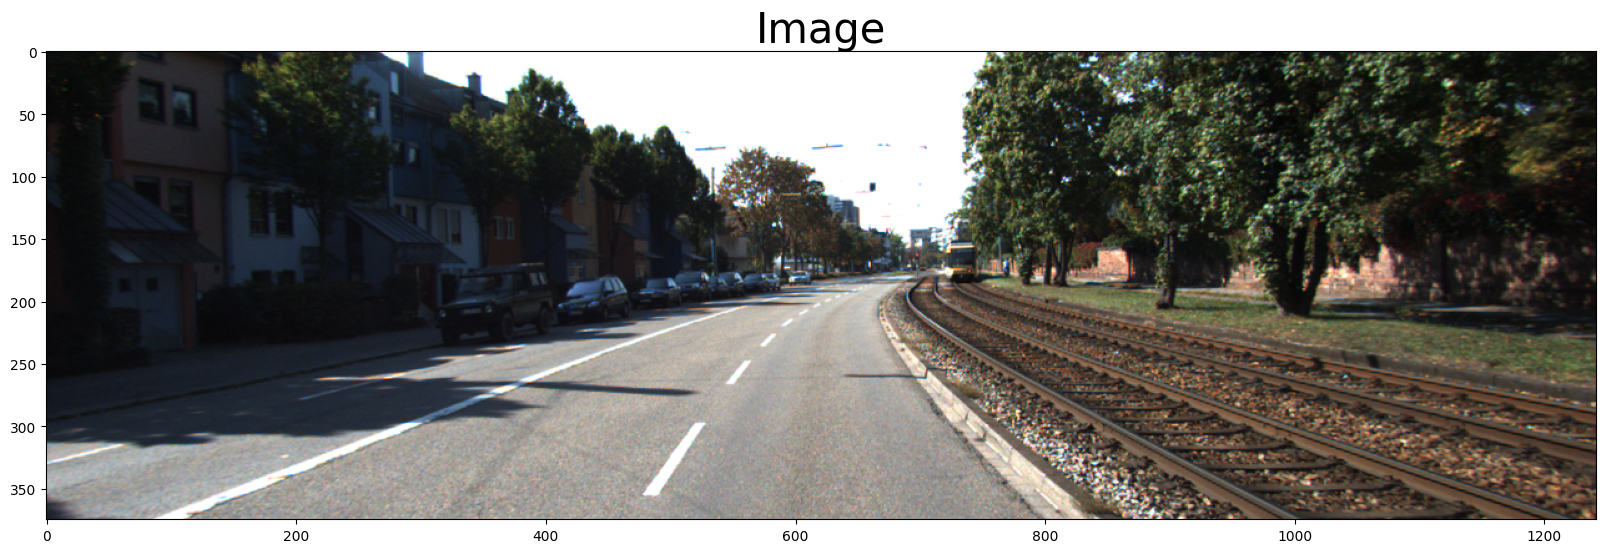

In [11]:
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Image', fontsize=30)

In [12]:
import pypotree
cloudpath = pypotree.generate_cloud_for_display(points)
pypotree.display_cloud_colab(cloudpath)

/usr/local/lib/python3.10/dist-packages/bin/PotreeConverter .tmp.txt -f xyz -o point_clouds -p f4a3e6 --material ELEVATION --edl-enabled --overwrite
server on port 45771: thread <Thread(Thread-12 (server_entry), started 139072903304768)> 
https://localhost:45771/point_clouds/pointclouds/f4a3e6
